In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import random
import matplotlib.pyplot as plt
from IPython.display import HTML

from mesa import Model, Agent
from mesa.space import SingleGrid
from mesa.time import RandomActivation

from mesa.visualization.modules import CanvasGrid
from mesa.visualization.MatplotlibVisualization import MatplotlibEngine

In [24]:
%matplotlib inline

In [25]:
class MovingAgent(Agent):
    def __init__(self, unique_id, model, pos, heading='right'):
        super().__init__(unique_id, model)
        self.pos = pos
        self.heading = heading
        self.horizontal_movement = {'left': -1, 'right': 1}
        self.vertical_movement = {'up': 1, 'down': -1}
        
    def step(self):
        if self.pos[0] == self.model.grid.width - 1:
            if self.pos[1] == 0:
                self.heading = 'up'
            elif self.pos[1] == self.model.grid.height - 1:
                self.heading = 'left'
        elif self.pos[0] == 0:
            if self.pos[1] == 0:
                self.heading = 'right'
            elif self.pos[1] == self.model.grid.height - 1:
                self.heading = 'down'
        
        horiz = self.horizontal_movement.get(self.heading, 0)
        vert = self.vertical_movement.get(self.heading, 0)
        self.model.grid.move_agent(self, (self.pos[0] + horiz, self.pos[1] + vert))

        
class StationaryAgent(Agent):
    def __init__(self, unique_id, model, pos, shape, name=None):
        super().__init__(unique_id, model)
        self.pos = pos
        self.shape = shape


class BasicModel(Model):
    def __init__(self, width=10, height=10):
        self.running = True
        self.grid = SingleGrid(width, height, torus=True)
        self.schedule = RandomActivation(self)

        ind = 1
        for x in range(1, self.grid.width - 1):
            for y in range(1, self.grid.height - 1):
                shape = random.choice(["square", "circle"])
                pos = (x, y)
                agent = StationaryAgent(ind, self, pos, shape)
                ind += 1
                self.schedule.add(agent)
                self.grid.place_agent(agent, pos)
        pos = (0, 0)
        mover = MovingAgent(0, self, pos)
        self.schedule.add(mover)
        self.grid.place_agent(mover, pos)


    def step(self):
        self.schedule.step()

In [26]:
def agent_draw(agent):
    portrayal = None
    if isinstance(agent, StationaryAgent):
        portrayal = {"Shape": agent.shape,
                     "Color": "pink" if agent.shape == "circle" else "purple",
                     "Text": "A" if agent.shape == "circle" else "B",
                     "Size": 100,
                     "Layer": 0
                     }
    elif isinstance(agent, MovingAgent):
        portrayal = {"Shape": "arrow",
                     "Dir": agent.heading,
                    "Color": "orange", 
                    "Size": 100,
                    "Layer": 0}
    return portrayal

In [27]:
grid_width = 10
grid_height = 10
canvas_grid = CanvasGrid(agent_draw, grid_width, grid_height)

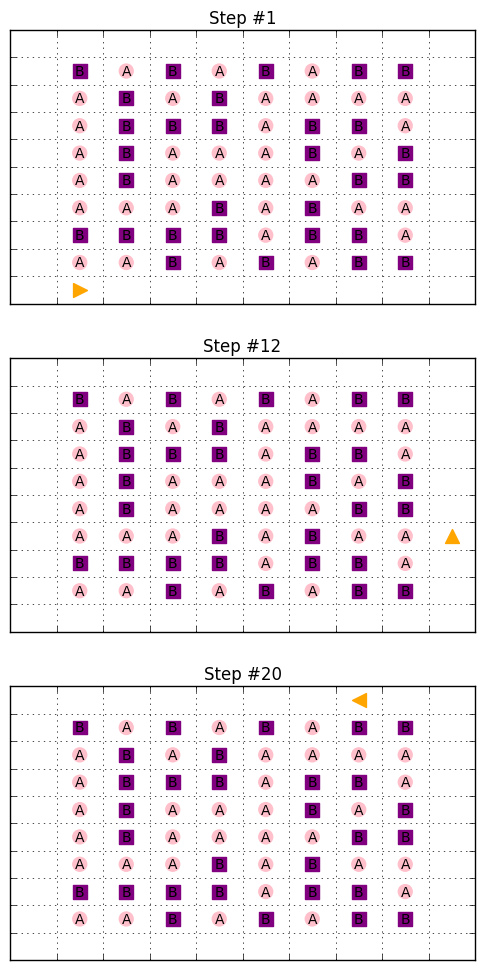

In [28]:
#Render a few static step visualizations

figsize = (6,12)
plotshape = (3, 1)
steps = [1, 12, 20]


engine = MatplotlibEngine(BasicModel, [canvas_grid], "MatplotlibDemo", 10, 10)
fig = server.render_steps(figsize, plotshape, steps)
fig.savefig("three_steps.png")
plt.show()